**Клевицкий Дмитрий 11.10.24**

1) На семинаре разобрали алгоритмы для нахождения максимального потока
2) Начал поиск данных для ИП

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

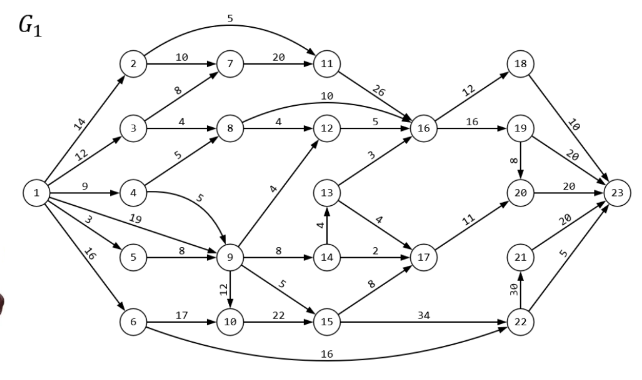

In [24]:
edges = [
    (1, 2, 14), (1, 3, 12), (1, 4, 9), (1,5,3), (1, 9, 19), (1, 6, 16),
    (2, 11, 5), (2, 7, 10),
    (3, 7, 8), (3, 8, 4),
    (4, 8, 5), (4, 9, 5),
    (5, 9, 8),
    (6, 10, 17), (6, 22, 16),
    (7, 11, 20),
    (8, 12, 4), (8, 16, 10),
    (9, 12, 4), (9, 14, 8), (9, 15, 5), (9, 10, 12),
    (10, 15, 22),
    (11, 16, 26), 
    (12, 16, 5),
    (13, 16, 3),
    (14, 13, 4), (14, 17, 2),
    (15, 17, 8), (15, 22, 34),
    (16, 18, 12), (16, 19, 16),
    (17, 20, 11),
    (18, 23, 10), (19, 23, 20), (19, 20, 8), (20, 23, 20), (21, 23, 20), (22, 21, 30), (22, 23, 5)
]
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

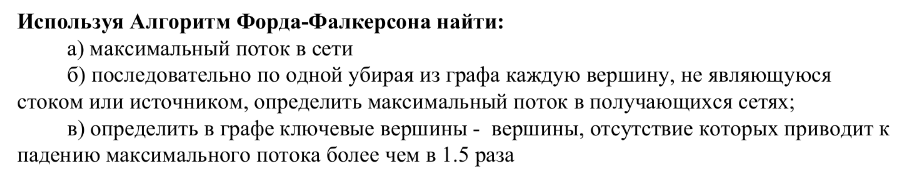

In [19]:
max_flow, flows = nx.maximum_flow(G, 1, 23, "weight")
print(f'{max_flow=}')

max_flow=61


In [26]:
G_new = nx.DiGraph()
G_new.add_weighted_edges_from(edges)
deleted_nodes = []
for _ in range(20):
    node_del = np.random.randint(2, 23)
    while node_del in deleted_nodes:
        node_del = np.random.randint(2, 23)
    G_new.remove_node(node_del)
    deleted_nodes.append(node_del)
    print(f"deleted: {deleted_nodes}    max_flow = {nx.maximum_flow(G_new, 1, 23, 'weight')[0]}")

deleted: [18]    max_flow = 51
deleted: [18, 17]    max_flow = 41
deleted: [18, 17, 8]    max_flow = 41
deleted: [18, 17, 8, 7]    max_flow = 37
deleted: [18, 17, 8, 7, 19]    max_flow = 25
deleted: [18, 17, 8, 7, 19, 4]    max_flow = 25
deleted: [18, 17, 8, 7, 19, 4, 16]    max_flow = 25
deleted: [18, 17, 8, 7, 19, 4, 16, 15]    max_flow = 16
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20]    max_flow = 16
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20, 14]    max_flow = 16
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20, 14, 3]    max_flow = 16
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20, 14, 3, 2]    max_flow = 16
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20, 14, 3, 2, 5]    max_flow = 16
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20, 14, 3, 2, 5, 6]    max_flow = 0
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20, 14, 3, 2, 5, 6, 21]    max_flow = 0
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20, 14, 3, 2, 5, 6, 21, 10]    max_flow = 0
deleted: [18, 17, 8, 7, 19, 4, 16, 15, 20, 14, 3, 2, 5, 6, 21, 10, 13]    max_flow 

In [33]:
valuable_nodes = []
for node in range(2, 23):
    G_new = nx.DiGraph()
    G_new.add_weighted_edges_from(edges)
    G_new.remove_node(node)
    flow = nx.maximum_flow(G_new, 1, 23, 'weight')[0]
    if max_flow / flow >= 1.5:
        valuable_nodes.append(node)
valuable_nodes

[16, 22]